This is the third iteration of this notebook. In this version I dropped all columns from the data except text and sentiment, and reduced sentiment scores to a binary

In [ ]:
import re # import regular expressions
import numpy as np # imports the numpy library, useful for arrays
import pandas as pd # imports the pandas library, useful for data stored in tables
import matplotlib.pyplot as plt #plotting library used for creating visualizations
import seaborn as sns # data visualization library based on matplotlib
import nltk # imports the Natural Language ToolKit
from nltk.stem import WordNetLemmatizer # imports the WordNetLemmatizer; useful for grouping together different forms of a word
from sklearn.svm import LinearSVC # imports the Linear Support Vector Classification class
from sklearn.naive_bayes import BernoulliNB # Imports the BernoulliNB class
from sklearn.linear_model import LogisticRegression # Imports the Logistic Regression class
from sklearn.model_selection import train_test_split # Imports the train_test_split function, used to split a dataset
from sklearn.feature_extraction.text import TfidfVectorizer # converts raw documents to a matrix of TF-IDF features (converts text into numbers)
from sklearn.metrics import classification_report # measures the quality of predictions from a classification algorithm
from sklearn.pipeline import Pipeline # pipelines assemble several steps of a process together

In [ ]:
nltk.download('omw-1.4') # downloads the Open Multilingual Wordnet, a database of English where different parts of speech are grouped into sets of cognitive synonyms
nltk.download('wordnet') # downloads the WordNet specifically for English

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
encoding = "ISO-8859-1" # a character encoding standard for Western European languages

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Apple-Twitter-Sentiment-DFE.csv', encoding = encoding) # creates a dataframe using the read_csv function from the pandas library

In [ ]:
data.head() # displays the first few rows of the dataset

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #AppleSnob.
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,"I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see"
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


In [ ]:
data.describe() # generates a summary of statistics

,_unit_id,_trusted_judgments,sentiment:confidence,id
count,3.886000e+03,3886.000000,3886.000000,3.886000e+03
mean,6.234975e+08,3.687082,0.829526,5.410039e+17
std,1.171906e+03,2.004595,0.175864,7.942752e+14
min,6.234955e+08,3.000000,0.332700,5.400000e+17
25%,6.234965e+08,3.000000,0.674475,5.400000e+17
50%,6.234975e+08,3.000000,0.811250,5.410000e+17
75%,6.234984e+08,3.000000,1.000000,5.420000e+17
max,6.235173e+08,27.000000,1.000000,5.420000e+17


In [ ]:
print(data.columns) # prints the columns of the dataframe

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'sentiment', 'sentiment:confidence', 'date', 'id',
       'query', 'sentiment_gold', 'text'],
      dtype='object')


In [ ]:
column = '_unit_id' # sets the column variable
print(f"Value counts for {column}:") # prints a string that includes the column name
print(data[column].value_counts()) # prints the value counts for the column

Value counts for _unit_id:
623495513    1
623498140    1
623498112    1
623498113    1
623498114    1
            ..
623496824    1
623496825    1
623496826    1
623496827    1
623517290    1
Name: _unit_id, Length: 3886, dtype: int64


This looks like a unique identifier for each row. This can easily be removed.

In [ ]:
column = '_golden' # sets the column variable
print(f"Value counts for {column}:") # prints a string that includes the column name
print(data[column].value_counts()) # prints the value counts for the column

Value counts for _golden:
False    3783
True      103
Name: _golden, dtype: int64


In [ ]:
column = '_unit_state' # sets the column variable
print(f"Value counts for {column}:") # prints a string that includes the column name
print(data[column].value_counts()) # prints the value counts for the column

Value counts for _unit_state:
finalized    3782
golden        104
Name: _unit_state, dtype: int64


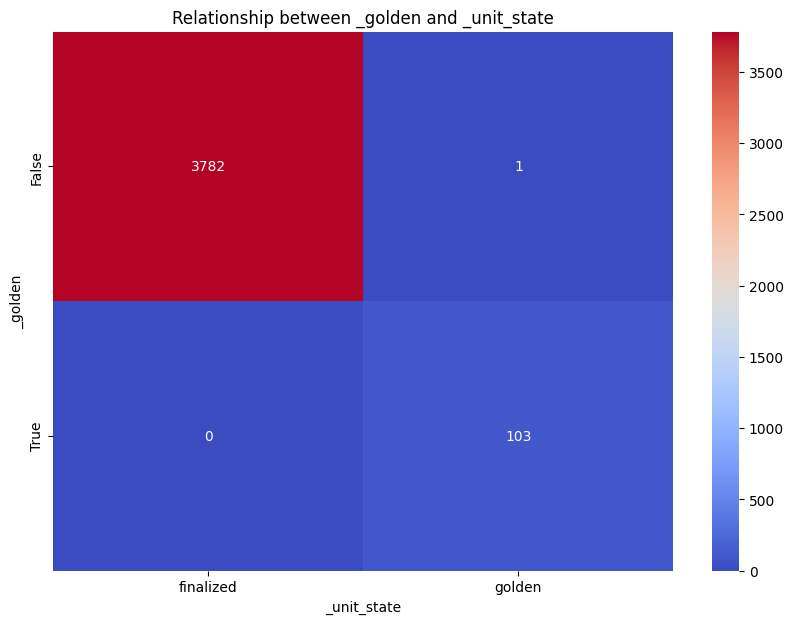

In [ ]:
cross_tab = pd.crosstab(data['_golden'], data['_unit_state']) # creates a cross tab table
plt.figure(figsize=(10, 7))  # sets the size of the plot
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d') # creates a heatmap using the cross tab data
plt.title('Relationship between _golden and _unit_state') # adds a title
plt.ylabel('_golden') # adds a label for the y axis
plt.xlabel('_unit_state') # adds a label for the x axis
plt.show() # displays the plot

I'm not sure what these mean but there's a one to one relationship between these two columns.

In [ ]:
column = '_trusted_judgments' # sets the column variable
print(f"Value counts for {column}:") # prints a string that includes the column name
print(data[column].value_counts()) # prints the value counts for the column

Value counts for _trusted_judgments:
3     3063
6      362
4      309
5       29
13      17
12      15
14      14
7       11
8       10
16       9
17       9
15       9
10       6
11       6
9        6
19       5
18       3
22       2
27       1
Name: _trusted_judgments, dtype: int64


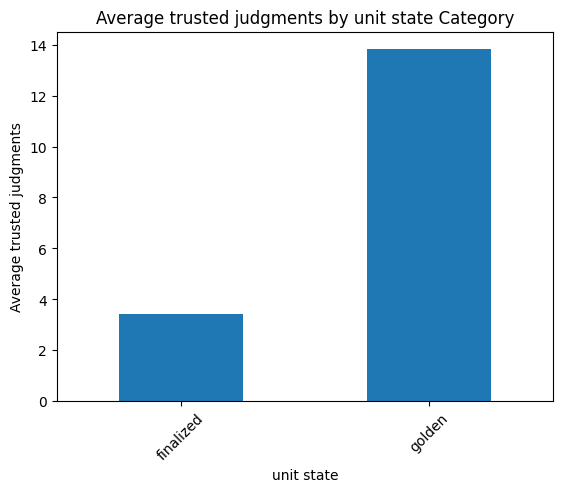

In [ ]:
mean_judgments = data.groupby('_unit_state')['_trusted_judgments'].mean() # calculates the mean of the trusted judgements column for each value of the unit state column
mean_judgments.plot(kind='bar') # creates a bar plot
plt.title('Average trusted judgments by unit state Category') # adds a title to the chart
plt.xlabel('unit state') # adds a label for the x axis
plt.ylabel('Average trusted judgments') # adds a label for the y axis
plt.xticks(rotation=45)  # Rotate the x-labels for better readability
plt.show() # displays the plot

The golden unit state has much higher average trusted judgements than the finalized unit state.

In [ ]:
column = 'sentiment' # sets the column variable
print(f"Value counts for {column}:") # prints a string that includes the column name
print(data[column].value_counts()) # prints the value counts for the column

Value counts for sentiment:
3               2162
1               1219
5                423
not_relevant      82
Name: sentiment, dtype: int64


In [ ]:
pd.set_option('display.max_colwidth', None) # configures pandas to display the full content of each column
not_relevant_tweets = data[data['sentiment'] == 'not_relevant'] # filters the sentiment column on the 'not_relevant' value
tweets_text = not_relevant_tweets['text'] # extracts the text column from the filtered dataframe
print(tweets_text.head()) # prints the results

17                      @Apple John Cantlie has been a prisoner of ISIS for 739 days, show you have not abandoned him. Sign https://t.co/WTn4fuiJ0P
20                                                                      $AAPL dip only momentarily....just an aberration in the equity world..#AAPL
75        My daughter's @Apple #iPod stolen. To the thief: try working as hard to earn one - like my daughter had to buy hers. #LosingFaithInPeople
106    RT  Chayton Falke ChaytonFalke :#Nasdaq100 #recent #market #exit #4: Sold $AAPL long for a 10.49% #gain in 20 days. #AAPL #forex #trading...
115     Myths vs. Reality in Full-Time #Trading http://t.co/JH7BMS1Kgb #stocks\r\n#futures #forex #trader #es #nq #cl #aapl #gpro #finance #eSignal
Name: text, dtype: object


In [ ]:
tweets_with_sentiment_5 = data[data['sentiment'] == '5'] # filters the sentiment column on the '5' value
tweets_text = tweets_with_sentiment_5['text'] # extracts the text column from the filtered dataframe
print(tweets_text.head()) # prints the results

6                                                                                Top 3 all @Apple #tablets. Damn right! http://t.co/RJiGn2JUuB
7                                                                  CNBCTV: #Apple's margins better than expected? #aapl http://t.co/7geVrtOGLK
13    RT @peterpham: Bought my @AugustSmartLock at the @apple store..pretty good logo match . can't wait to install it! http://t.co/z8VKMhbnR3
28                                          Latest Apple Products Leading in Efficiency http://t.co/KHeNlVT1FJ @apple #iPhone #iPad #plugloads
33                                                                             RT @saxonidubom: @rwang0 @Apple Thanks...thinking of upgrading.
Name: text, dtype: object


In [ ]:
tweets_with_sentiment_1 = data[data['sentiment'] == '1'] # filters the sentiment column on the '1' value
tweets_text = tweets_with_sentiment_1['text'] # extracts the text column from the filtered dataframe
print(tweets_text.head()) # prints the results

10                                                                         WTF MY BATTERY WAS 31% ONE SECOND AGO AND NOW IS 29% WTF IS THIS @apple
14               @apple Contact sync between Yosemite and iOS8 is seriously screwed up. It used to be much more stable in the past. #icloud #isync
16                                                WARNING IF YOU BUY AN IPHONE 5S UNLOCKED FROM @APPLE IPHONE YOU CANNOT USE IT ON VERIZON NETWORK
23    @Apple, For the love of GAWD, CENTER the '1'on the damn calendar app. You fixed it once, its back, off center, AGAIN! http://t.co/dMyAHEm1Lc
24                                                               i get the storage almost full notification literally every 5 minutes chill @apple
Name: text, dtype: object


It seems pretty clear that 1 is bad and 5 is good. It's unclear how to convert 'not relevant' into a number so I'm going to remove these.

In [ ]:
data = data[data['sentiment'] != 'not_relevant'] # removes sentiment = not_relevant from the dataset

In [ ]:
data['sentiment'] = pd.to_numeric(data['sentiment'], errors='coerce') # converts sentiment to a number

<ipython-input-194-68f8f21b061f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = pd.to_numeric(data['sentiment'], errors='coerce') # converts sentiment to a number


In [ ]:
column = 'sentiment:confidence' # sets the column variable
print(f"Value counts for {column}:") # prints a string that includes the column name
print(data[column].value_counts()) # prints the value counts for the column

Value counts for sentiment:confidence:
1.0000    1886
0.6722      41
0.6884      32
0.6825      29
0.6635      27
          ... 
0.5411       1
0.6667       1
0.5211       1
0.6961       1
0.9230       1
Name: sentiment:confidence, Length: 635, dtype: int64


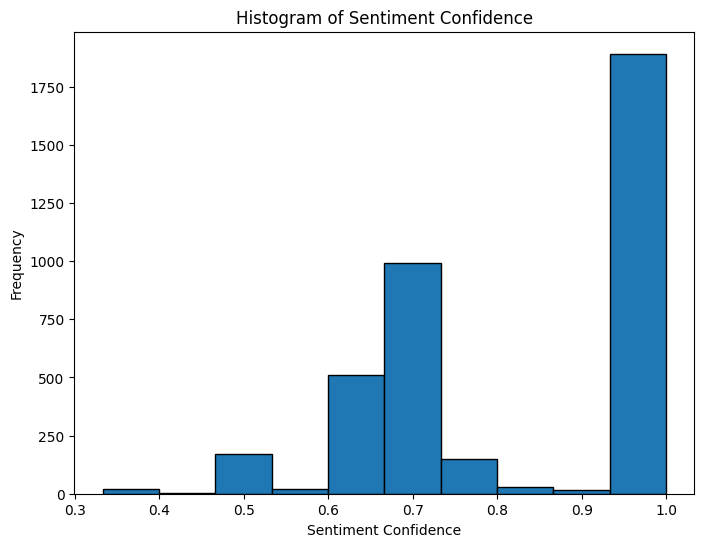

In [ ]:
plt.figure(figsize=(8, 6)) # sets the size of the chart
plt.hist(data['sentiment:confidence'], bins=10, edgecolor='black') # creates a histrogram of the sentiment:confidence column
plt.title('Histogram of Sentiment Confidence') # adds a title
plt.xlabel('Sentiment Confidence') # labels the x axis
plt.ylabel('Frequency') # labels the y axis
plt.show() # displays the histogram

Most sentiments have a high confidence score.

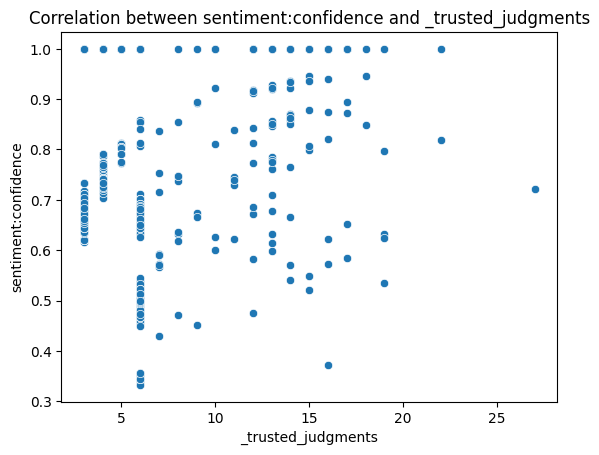

In [ ]:
sns.scatterplot(x='_trusted_judgments', y='sentiment:confidence', data=data) # creates a scatterplot of trusted judgements vs sentiment:confidence
plt.title('Correlation between sentiment:confidence and _trusted_judgments') # adds a title
plt.show() # displays the plot

Looks like a low correlation! This would indicate that confidence can be high even with only a few trusted judgements.

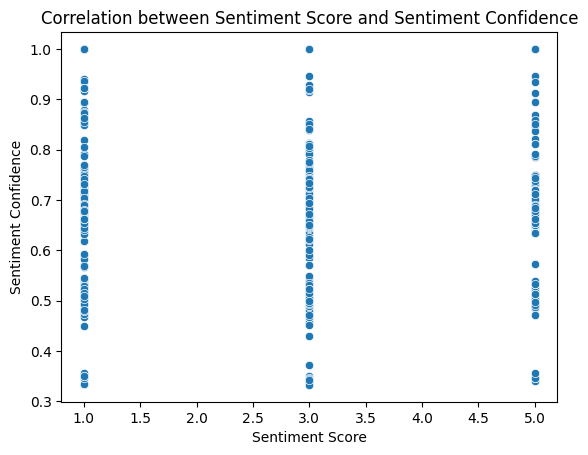

In [ ]:
sns.scatterplot(x='sentiment', y='sentiment:confidence', data=data) # creates a scatterplot of sentiment vs sentiment:confidence
plt.title('Correlation between Sentiment Score and Sentiment Confidence') # adds a title
plt.xlabel('Sentiment Score') # labels the x axis
plt.ylabel('Sentiment Confidence') # labels the y axis
plt.show() # displays the plot

In [ ]:
correlation = data['sentiment:confidence'].corr(data['sentiment']) # calculates the correlation coefficient between sentiment and sentiment:confidence
print("Correlation coefficient between sentiment:confidence and sentiment score:", format(correlation, '.2f')) # prints the correlation coefficient

Correlation coefficient between sentiment:confidence and sentiment score: -0.13


There is no correlation between these two variables.

In [ ]:
grouped_confidence = data.groupby('sentiment')['sentiment:confidence'].agg(['mean', 'median', 'min', 'max', 'std']) # groups data by the sentiment column then aggregates data about the sentiment:confidence column
print(grouped_confidence) # prints the results

               mean  median     min  max       std
sentiment                                         
1          0.859857  1.0000  0.3339  1.0  0.172081
3          0.825813  0.7481  0.3327  1.0  0.173324
5          0.788634  0.6971  0.3404  1.0  0.179424


the mean and median decrease as the sentiment increases. does this mean that annotators are more confident about negative sentiments than positive sentiments?

In [ ]:
column = 'id' # sets the column variable
print(f"Value counts for {column}:") # prints a string that includes the column name
print(data[column].value_counts()) # prints the value counts for the column

Value counts for id:
5.410000e+17    1407
5.420000e+17    1212
5.400000e+17    1185
Name: id, dtype: int64


I'm not sure what this ID refers to.

In [ ]:
column = 'query' # sets the column variable
print(f"Value counts for {column}:") # prints a string that includes the column name
print(data[column].value_counts()) # prints the value counts for the column

Value counts for query:
#AAPL OR @Apple    3804
Name: query, dtype: int64


This is the same for all rows and can be removed.

In [ ]:
column = 'sentiment_gold' # sets the column variable
print(f"Value counts for {column}:") # prints a string that includes the column name
print(data[column].value_counts()) # prints the value counts for the column

Value counts for sentiment_gold:
1                     39
3                     16
5                     12
3\n1                  10
3\nnot_relevant        9
5\n3                   9
3\n1\nnot_relevant     3
5\n3\nnot_relevant     3
5\n3\n1                1
Name: sentiment_gold, dtype: int64


These values are a combination of the different sentiment scores. Looks like a lot of values are missing.

In [ ]:
# check if we have missing values
for column in data.columns: # loops through all columns in the data
  print("There are", data[column].isnull().sum().sum(), "missing values in the ", column, " column.") # looks for missing values and prints the results

There are 0 missing values in the  _unit_id  column.
There are 0 missing values in the  _golden  column.
There are 0 missing values in the  _unit_state  column.
There are 0 missing values in the  _trusted_judgments  column.
There are 102 missing values in the  _last_judgment_at  column.
There are 0 missing values in the  sentiment  column.
There are 0 missing values in the  sentiment:confidence  column.
There are 0 missing values in the  date  column.
There are 0 missing values in the  id  column.
There are 0 missing values in the  query  column.
There are 3702 missing values in the  sentiment_gold  column.
There are 0 missing values in the  text  column.


Confirmed! Dropping the sentiment_gold column.

In [ ]:
# Check if the rows where sentiment_gold is not missing correspond to _unit_state being 'golden'

golden_matches = data.loc[data['sentiment_gold'].notna() & (data['_unit_state'] == 'golden')] # identifies rows where sentiment_gold is not null and unit_state is golden

non_missing_gold = data['sentiment_gold'].notna().sum() # identifies rows where sentiment_gold is not null
golden_state_count = (data['_unit_state'] == 'golden').sum() # identifies rows where unit state is golden
matches_count = len(golden_matches) # gets the number of rows in the golden matches data frame

print(f"Total non-missing sentiment_gold entries: {non_missing_gold}") # prints out the results of non_missing_gold
print(f"Total golden _unit_state entries: {golden_state_count}") # prints out the results of golden_state_count
print(f"Entries where both conditions match: {matches_count}") # prints out the results of matches_count

Total non-missing sentiment_gold entries: 102
Total golden _unit_state entries: 103
Entries where both conditions match: 102


Based on the data exploration (and prior examples) I'm dropping all columns except sentiment and text. I tried including sentiment confidence in an earlier iteration to see if it improved accuracy but it did not.

In [ ]:
# Removing the unnecessary columns.
data = data[['sentiment','text']]

In [ ]:
data.head(10)

,sentiment,text
0,3,#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx
1,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9
2,3,My cat only chews @apple cords. Such an #AppleSnob.
3,3,"I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see"
4,3,Nobody expects the Spanish Inquisition #AAPL
5,3,#AAPL:5 Rocket Stocks to Buy for December Gains: Apple and More...http://t.co/eG5XhXdLLS
6,5,Top 3 all @Apple #tablets. Damn right! http://t.co/RJiGn2JUuB
7,5,CNBCTV: #Apple's margins better than expected? #aapl http://t.co/7geVrtOGLK
8,3,Apple Inc. Flash Crash: What You Need to Know http://t.co/YJIgtifdAj #AAPL
9,3,#AAPL:This Presentation Shows What Makes The World's Biggest Tech Companies ...http://t.co/qlH9PqSoSd


In [ ]:
# create new column called sentiment and store as positive for sentiment over 3 and negative for the rest
data['sentiment'] = data['sentiment'].apply(lambda x: "Positive" if (x >= 3) else "Negative")
data.head(10)

,sentiment,text
0,Positive,#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx
1,Positive,RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9
2,Positive,My cat only chews @apple cords. Such an #AppleSnob.
3,Positive,"I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see"
4,Positive,Nobody expects the Spanish Inquisition #AAPL
5,Positive,#AAPL:5 Rocket Stocks to Buy for December Gains: Apple and More...http://t.co/eG5XhXdLLS
6,Positive,Top 3 all @Apple #tablets. Damn right! http://t.co/RJiGn2JUuB
7,Positive,CNBCTV: #Apple's margins better than expected? #aapl http://t.co/7geVrtOGLK
8,Positive,Apple Inc. Flash Crash: What You Need to Know http://t.co/YJIgtifdAj #AAPL
9,Positive,#AAPL:This Presentation Shows What Makes The World's Biggest Tech Companies ...http://t.co/qlH9PqSoSd


In [ ]:
# Stores the data into lists
text, sentiment = list(data['text']), list(data['sentiment']) # Assigns lists of 'text' and 'sentiment' column values to text and sentiment variables, respectively.

In [ ]:
# Defines a dictionary containing all emojis with their meanings
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [ ]:
## Defines a set containing all stopwords in english
stopwords = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
# groups together the inflected forms ("better" -> "good")
lemmatizer = WordNetLemmatizer() # Creates an instance of the WordNetLemmatizer class from NLTK and assigns it to the variable lemmatizer. This object can be used to lemmatize words in text processing, converting them to their base or dictionary form.

In [ ]:
def preprocess(textdata): # defines the preprocess function with input variable textdata
    processed_texts = [] # Initializes an empty list named processed_texts

    # Defining regex patterns.
    url_pattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)" # defines a regex pattern for URLs
    user_pattern = '@[^\s]+' # defines a regex pattern for user names
    alpha_pattern = "[^a-zA-Z0-9]" # defines a regex pattern for non-alphanumeric characters
    sequence_pattern = r"(.)\1\1+" # defines a regex pattern for recurring characters
    seq_replace_pattern = r"\1\1" # defines a regex pattern for replacing matched sequences with just two occurences of the matched character

    for tweet in textdata: # initialize a for loop that loops through all tweets in the text list
        tweet = tweet.lower() # converts the current tweet to lowercase
        tweet = re.sub(url_pattern, ' URL', tweet) # Replace all URls with 'URL'

        # Replace all emojis.
        for emoji in emojis.keys(): # initialize a for loop that loops through all emojis in the emojis dictionary
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji]) # replaces any emojis with EMOJI + the corresponding text label
        tweet = re.sub(user_pattern, ' USER', tweet) # Replace @USERNAME to 'USER'
        tweet = re.sub(alpha_pattern, " ", tweet) # Replace all non alphabets.
        tweet = re.sub(sequence_pattern, seq_replace_pattern, tweet) # Replace 3 or more consecutive letters by 2 letter.

        preprocessed_words = [] # Initializes an empty list named preprocessed_words
        for word in tweet.split(): # initializes a for loop that loops through each word in the tweet
            if len(word) > 1 and word not in stopwords: # Check if the word is bigger than one character and not in the stopword dictionary.
                word = lemmatizer.lemmatize(word) # Lemmatizing the word
                preprocessed_words.append(word) # adds the lemmatized word to the preprocessed_words list

        processed_texts.append(' '.join(preprocessed_words)) # creates a new string with the list of preprocessed words separated by a space

    return processed_texts # returns the processed_texts string

In [ ]:
processedtext = preprocess(text) # calls the preprocess function for the text list

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment, test_size = 0.2, random_state = 0) # splits processedtext and sentiment into training and test sets, using 20% of the data for testing

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features = 500000) # initializes TfidVectorizer, ngram_range means it considers single words and pairs of words, max_features limits the number of features to 500,000

In [ ]:
vectorizer.fit(X_train) #fits the vectorizer to the x_train data

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [ ]:
X_train = vectorizer.transform(X_train) # transforms X_train into TF-IDF feature vectors
X_test  = vectorizer.transform(X_test) # transforms X_test into TF-IDF feature vectors

In [ ]:
def model_evaluate(model): # Defines a function named model_evaluate that takes a model as its parameter.
    y_pred = model.predict(X_test) # uses the predict method of the given model to make predictions on X_test.
    print(classification_report(y_test, y_pred)) # Prints the classification report

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1) # creates an instance of logistic regression
LRmodel.fit(X_train, y_train) # trains the logistic regression model
model_evaluate(LRmodel) # calls the model_evaluate function described in the above codeblock

              precision    recall  f1-score   support

    Negative       0.88      0.57      0.69       248
    Positive       0.82      0.96      0.89       513

    accuracy                           0.83       761
   macro avg       0.85      0.77      0.79       761
weighted avg       0.84      0.83      0.82       761



In [ ]:
SVCmodel = LinearSVC() # creates an instance of linear SVC
SVCmodel.fit(X_train, y_train) # trains the linear SVC model
model_evaluate(SVCmodel) # calls the model_evaluate function

              precision    recall  f1-score   support

    Negative       0.86      0.65      0.74       248
    Positive       0.85      0.95      0.90       513

    accuracy                           0.85       761
   macro avg       0.85      0.80      0.82       761
weighted avg       0.85      0.85      0.84       761



In [ ]:
BNBmodel = BernoulliNB(alpha = 2) # creates an instance of BernoulliNB
BNBmodel.fit(X_train, y_train) # trains the BernoulliNB model
model_evaluate(BNBmodel) # calls the model_evaluate function

              precision    recall  f1-score   support

    Negative       1.00      0.06      0.11       248
    Positive       0.69      1.00      0.81       513

    accuracy                           0.69       761
   macro avg       0.84      0.53      0.46       761
weighted avg       0.79      0.69      0.59       761



In [ ]:
def predict(model, text): # defines a function predict that takes a model and a text input
    # Predict the sentiment
    preprocessed_text = preprocess(text) # calls the preprocess function
    preprocessed_text = vectorizer.transform(preprocessed_text)
    predictions = model.predict(preprocessed_text) # makes a prediction about the preprocessed text

    # Make a list of text with sentiment.
    data = [] # initializes an empty list
    for t, pred in zip(text, predictions): # starts a for loop that runs through the zipped list of text and predictions
        data.append((t, pred)) # appends a tuple to data containing the original text t, the numeric prediction, and the sentiment label

    return data # returns the data variable

In [ ]:
text = ["This model is awesome"]
prediction = predict(SVCmodel, text)
print(prediction)

[('This model is awesome', 'Positive')]
